In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/NSSC_HACKATHON/nsscdataset.csv"

Installing required dependencies

In [ ]:
!pip install scikeras

In [ ]:
!pip install shap

Importing neccessary libraries and frameworks

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import shap
from datetime import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
from builtins import range

Reading the given dataset

In [ ]:
df = pd.read_csv(file_path)

## EDA

**Data** **inspection**

Visualizing the dataset

In [ ]:
df.head(5)

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,...,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889472e+11,Very Slow,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,NaN,...,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,Slow,65210.346095,40519.173105,NaN,NaN,57298148.0,35603420.0,NaN,...,1.497352,2.457795e+06,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,NaN,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,4.557,...,1.966857,2.458120e+06,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901568e+11,Very Slow,40225.948191,24994.839864,NaN,NaN,NaN,26522368.0,5.093,...,1.527904,2.457902e+06,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901568e+11,Very Slow,35426.991794,NaN,0.407832,158.646713,61010824.0,NaN,5.154,...,NaN,2.457814e+06,NaN,NaN,NaN,NaN,15.0,NaN,Low,True


Knowing some properties of the dataset

In [ ]:
df.shape

(4534, 24)

In [ ]:
df.columns

Index(['Name', 'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis',
       'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist',
       'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'approach_year',
       'approach_month', 'approach_day', 'Orbital Period',
       'Orbit Uncertainity', 'Hazardous'],
      dtype='object')

Cheking the data types of the columns of the dataframe

In [ ]:
df.dtypes

,0
Name,int64
Epoch Date Close Approach,float64
Relative Velocity km per sec,object
Relative Velocity km per hr,float64
Miles per hour,float64
Miss Dist.(Astronomical),float64
Miss Dist.(lunar),float64
Miss Dist.(kilometers),float64
Miss Dist.(miles),float64
Jupiter Tisserand Invariant,float64


In [ ]:
df.describe()

,Name,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day
count,4.534000e+03,3.280000e+03,3033.000000,3668.000000,3933.000000,3417.000000,3.166000e+03,3.882000e+03,2802.000000,3.007000e+03,3346.000000,3438.000000,3400.000000,3719.000000,2.970000e+03,3616.000000,3026.000000,3715.000000,3006.000000,3991.000000
mean,3.268624e+06,1.178921e+12,50516.969113,31312.455735,0.258221,100.709883,3.842441e+07,2.391178e+07,5.126265,2.457720e+06,1.358242,172.185790,185.148924,1.898115,2.457741e+06,182.735237,0.761090,2006.920592,6.474385,14.896517
std,5.517954e+05,1.986535e+11,26530.144294,16386.183907,0.146070,56.938739,2.207442e+07,1.357595e+07,1.197144,9.248399e+02,0.465313,103.055919,103.417240,0.834499,9.155433e+02,107.757042,0.337745,6.292621,3.462926,5.717762
min,2.000433e+06,7.889472e+11,1207.814804,750.489149,0.000178,0.187669,2.660989e+04,1.653462e+04,2.367000,2.450936e+06,0.615920,0.001941,0.006918,0.803765,2.450100e+06,0.003191,0.239363,1995.000000,1.000000,1.000000
25%,3.092344e+06,1.014365e+12,30437.415189,18843.393552,0.135807,52.877514,1.950318e+07,1.246634e+07,4.179250,2.458000e+06,0.990008,83.288427,96.100513,1.260397,2.457826e+06,87.066671,0.483841,2002.000000,3.000000,8.000000
50%,3.513224e+06,1.202458e+12,46968.245275,28959.416222,0.265281,104.261452,3.987901e+07,2.476464e+07,5.102500,2.458000e+06,1.223551,173.895246,192.420121,1.590005,2.457976e+06,189.051112,0.737684,2008.000000,7.000000,15.000000
75%,3.691155e+06,1.354954e+12,65210.346095,40331.941346,0.387033,150.434433,5.769962e+07,3.581782e+07,6.043000,2.458000e+06,1.626350,253.635285,273.067950,2.331365,2.458109e+06,278.038676,1.002870,2013.000000,10.000000,22.000000
max,3.781897e+06,1.473318e+12,160681.487851,99841.227826,0.499884,194.359650,7.478160e+07,4.646713e+07,9.025000,2.458000e+06,2.568553,359.905890,359.993098,4.662158,2.458706e+06,359.917991,1.946801,2016.000000,12.000000,22.000000


Calculating the median and range of the dataset by first creating a subset of dataframe containing only numeric values

In [ ]:
numeric_df = df.select_dtypes(include='number')
median = numeric_df.median()
median

,0
Name,3.513224e+06
Epoch Date Close Approach,1.202458e+12
Relative Velocity km per hr,4.696825e+04
Miles per hour,2.895942e+04
Miss Dist.(Astronomical),2.652806e-01
Miss Dist.(lunar),1.042615e+02
Miss Dist.(kilometers),3.987901e+07
Miss Dist.(miles),2.476464e+07
Jupiter Tisserand Invariant,5.102500e+00
Epoch Osculation,2.458000e+06


In [ ]:
range = numeric_df.max() - numeric_df.min()
range

,0
Name,1.781464e+06
Epoch Date Close Approach,6.843708e+11
Relative Velocity km per hr,1.594737e+05
Miles per hour,9.909074e+04
Miss Dist.(Astronomical),4.997062e-01
Miss Dist.(lunar),1.941720e+02
Miss Dist.(kilometers),7.475499e+07
Miss Dist.(miles),4.645060e+07
Jupiter Tisserand Invariant,6.658000e+00
Epoch Osculation,7.064000e+03


Checking which columns contain missing values in the dataframe

In [ ]:
df.isnull().any()

,0
Name,False
Epoch Date Close Approach,True
Relative Velocity km per sec,True
Relative Velocity km per hr,True
Miles per hour,True
Miss Dist.(Astronomical),True
Miss Dist.(lunar),True
Miss Dist.(kilometers),True
Miss Dist.(miles),True
Jupiter Tisserand Invariant,True


Identifying which features are numerical features and which features are categorical features among the columns of the dataframe

In [ ]:
# Identifying numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Features: {numerical_features}")

# Identifying categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Features: {categorical_features}")


Numerical Features: ['Name', 'Epoch Date Close Approach', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis', 'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'approach_year', 'approach_month', 'approach_day']
Categorical Features: ['Relative Velocity km per sec', 'Orbital Period', 'Orbit Uncertainity']


An information that is needed after some time

In [ ]:
(2 * df['Semi Major Axis'] - df['Aphelion Dist']).min()

0.09278427688648216

Defining some conversion factors and constants that are required later on

In [ ]:
miles_to_au = 1.60934e-8
km_to_au = 6.68459e-9
lunar_to_au = 0.0025696
au_to_miles = 9.296e+7
au_to_km = 1.496e+8
au_to_lunar = 389
miles_to_km = 1.60934
km_to_miles = 0.621371

G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
M = 1.989e30     # Mass of the Sun in kg
AU_TO_METERS = 1.496e11  # 1 AU in meters
P_earth = 365.25  # Orbital period of Earth in days

Handling the missing values of some particular columns of the dataframe

In [ ]:
df['Miss Dist.(Astronomical)'] = df['Miss Dist.(Astronomical)'].fillna(df['Miss Dist.(miles)'] * miles_to_au)
df['Miss Dist.(Astronomical)'] = df['Miss Dist.(Astronomical)'].fillna(df['Miss Dist.(kilometers)'] * km_to_au)
df['Miss Dist.(Astronomical)'] = df['Miss Dist.(Astronomical)'].fillna(df['Miss Dist.(lunar)'] * lunar_to_au)
df['Miss Dist.(miles)'] = df['Miss Dist.(miles)'].fillna(df['Miss Dist.(Astronomical)'] * au_to_miles)
df['Miss Dist.(kilometers)'] = df['Miss Dist.(kilometers)'].fillna(df['Miss Dist.(Astronomical)'] * au_to_km)
df['Miss Dist.(lunar)'] = df['Miss Dist.(lunar)'].fillna(df['Miss Dist.(Astronomical)'] * au_to_lunar)
df['Relative Velocity km per hr'] = df['Relative Velocity km per hr'].fillna(df['Miles per hour'] * miles_to_km)
df['Miles per hour'] = df['Miles per hour'].fillna(df['Relative Velocity km per hr'] * km_to_miles)
df['Epoch Date Close Approach'] = df['Epoch Date Close Approach'].interpolate()

Handling the missing values of the rest of the columns of the dataframe

In [ ]:
df[numerical_features] = df[numerical_features].fillna(method='bfill')
df[numerical_features] = df[numerical_features].fillna(method='ffill')
# For categorical columns: Filling missing values with the mode
for column in categorical_features:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-19-f8925a3461cc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numerical_features] = df[numerical_features].fillna(method='bfill')
<ipython-input-19-f8925a3461cc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numerical_features] = df[numerical_features].fillna(method='ffill')
<ipython-input-19-f8925a3461cc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation

**Feature Engineering**

Converting the three columns into int type for subsequent operations to convert them into a datetime feature

In [ ]:
df['approach_year'] = df['approach_year'].astype(int)
df['approach_month'] = df['approach_month'].astype(int)
df['approach_day'] = df['approach_day'].astype(int)

Creating a column 'date' which is the merged version of approach_year, approach_month, approach_day and is a datetime feature

In [ ]:
df['date'] = pd.to_datetime(
    df[['approach_year', 'approach_month', 'approach_day']]
    .rename(columns={'approach_year': 'year', 'approach_month': 'month', 'approach_day': 'day'})
)

since semi major axis is in astronomical units, we took the ratio using miss dist.(astronomical)

In [ ]:
df['Miss Distance vs Semi-major Axis Ratio'] = df['Miss Dist.(Astronomical)'] / df['Semi Major Axis']

Since the column "Epoch Date Close Approach" contains number instead of date , we converted it into date assuming that the column was given in unix time

In [ ]:
df['Epoch Date Close Approach'] = pd.to_datetime(df['Epoch Date Close Approach'], unit='ms')

current_date = datetime.now()

# Calculating 'Time Until Approach' as the difference in days
df['Time Until Approach'] = (df['Epoch Date Close Approach'] - current_date).dt.days

We checked in a previous code cell that (2 * df['Semi Major Axis']) - df['Aphelion Dist'] was giving no negative values but after filling of missing values some rows were giving negative output. So we took the 'absolute' values of those rows.

In [ ]:
df['Perihelion Dist'] = (2 * df['Semi Major Axis']) - df['Aphelion Dist']
df['Perihelion Dist'] = df['Perihelion Dist'].abs()
df['eccentricity'] = (df['Aphelion Dist'] - df['Perihelion Dist']) / (df['Aphelion Dist'] + df['Perihelion Dist'])
df['eccentricity'] = df['eccentricity'].abs()

For further calculations unit needed is meters. So we did some unit conversions to the required column.

In [ ]:
df['Semi Major Axis(meters)'] = df['Semi Major Axis'] * AU_TO_METERS

Calculated the required features using the data provided

In [ ]:
df['Average Orbital Velocity'] = (G * M / df['Semi Major Axis(meters)']) ** 0.5

In [ ]:
df['Orbital Period'] = 2 * 3.14159 * ((df['Semi Major Axis(meters)'] ** 3 / (G * M)) ** 0.5) # Here the calculated orbital period is in seconds

In [ ]:
df['Mean Anomaly(radians)'] = np.deg2rad(df['Mean Anomaly'])

The calculated Heliocentric Distance is in meters

In [ ]:
# Defining a function to solve for E using the Newton-Raphson method.
def solve_kepler_equation(M, e, tolerance=1e-6):
    # Initial guess for E is M (works well when e is small)
    E = M
    while True:
        E_new = E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        if abs(E_new - E) < tolerance:
            break
        E = E_new
    return E

df['Eccentric Anomaly'] = df.apply(lambda row: solve_kepler_equation(row['Mean Anomaly(radians)'], row['eccentricity']), axis=1)

# Calculating True Anomaly using the relation with Eccentric Anomaly.
df['True Anomaly(radians)'] = 2 * np.arctan2(
    np.sqrt(1 + df['eccentricity']) * np.sin(df['Eccentric Anomaly'] / 2),
    np.sqrt(1 - df['eccentricity']) * np.cos(df['Eccentric Anomaly'] / 2)
)

# Calculating the Heliocentric Distance.
df['Heliocentric Distance'] = df['Semi Major Axis(meters)'] * (1 - df['eccentricity'] ** 2) / (1 + df['eccentricity'] * np.cos(df['True Anomaly(radians)']))

In [ ]:
df['Escape Velocity'] = ((2 * G * M) / df['Heliocentric Distance']) ** 0.5

In [ ]:
df['Specific Orbital Energy'] = - (G * M) / (2 * df['Semi Major Axis(meters)'])

In [ ]:
df['Specific Angular Momentum'] = (G * M * df['Semi Major Axis(meters)'] * (1 - df['eccentricity']**2)) ** 0.5

In [ ]:
df['Perihelion Dist(meters)'] = df['Perihelion Dist'] * AU_TO_METERS  #Did some unit conversions as previously Perihelion Dist and Aphelion Dist were in AU.
df['Aphelion Dist(meters)'] = df['Aphelion Dist'] * AU_TO_METERS

In [ ]:
df['Velocity at Perihelion'] = (G * M * ((2 / df['Perihelion Dist(meters)']) - (1 / df['Semi Major Axis(meters)']))) ** 0.5

In [ ]:
df['Velocity at Aphelion'] = (G * M * (2 / df['Aphelion Dist(meters)'] - 1 / df['Semi Major Axis(meters)'])) ** 0.5

In [ ]:
df['Orbital Period (days)'] = df['Orbital Period'] / 86400  #Did unit conversion from seconds to days

In [ ]:
average_miss_distances = {
    'Astronomical': df['Miss Dist.(Astronomical)'].mean(),
    'Lunar': df['Miss Dist.(lunar)'].mean(),
    'Kilometers': df['Miss Dist.(kilometers)'].mean(),
    'Miles': df['Miss Dist.(miles)'].mean()
}

print("Average Miss Distances:")
for category, avg in average_miss_distances.items():
    print(f"{category}: {avg}")

closest_approach_distance = {
    'Astronomical': df['Miss Dist.(Astronomical)'].min(),
    'Lunar': df['Miss Dist.(lunar)'].min(),
    'Kilometers': df['Miss Dist.(kilometers)'].min(),
    'Miles': df['Miss Dist.(miles)'].min()
}

print("\nClosest Approach Distances:")
for category, closest in closest_approach_distance.items():
    print(f"{category}: {closest}")


Average Miss Distances:
Astronomical: 0.27136068368385563
Lunar: 101.23585508540677
Kilometers: 39120644.24006244
Miles: 23906903.28918145

Closest Approach Distances:
Astronomical: 0.0001778761
Lunar: 0.0691938029
Kilometers: 26609.88671875
Miles: 16534.6171875


In [ ]:
df['Synodic Period (days)'] = 1 / (abs(1 / df['Orbital Period (days)'] - 1 / P_earth))

In [ ]:
df['Mean Motion (degrees/day)'] = 360 / df['Orbital Period (days)']

**Additional Features**

'Relative Velocity Ratio' feature captures the speed of the asteroid relative to its proximity, which could be crucial in assessing risk. Faster-moving asteroids at a closer distance could pose higher risks.

In [ ]:
df['Relative Velocity Ratio'] = df['Relative Velocity km per hr'] / (df['Miss Dist.(kilometers)'] * 3600)

'Orbital Energy Ratio' could help differentiate asteroids that are more likely to stay in orbit near Earth versus those that might escape.

In [ ]:
df['Orbital Energy Ratio'] = df['Specific Orbital Energy'] / (df['Escape Velocity'] ** 2)

'Perihelion To Earth Ratio' can help capture how close an asteroid comes to both the Sun and Earth, which might affect its orbit and potential hazard.

In [ ]:
df['Perihelion To Earth Ratio'] = df['Perihelion Dist(meters)'] / (df['Miss Dist.(kilometers)'] * 1000)

Variations between approach speed and average orbital speed might indicate changing trajectories, which could correlate with unpredictability and hazard potential.

In [ ]:
df['Velocity Change Indicator'] = (df['Relative Velocity km per hr'] / 3600) - df['Average Orbital Velocity']

In [ ]:
df.dtypes

,0
Name,int64
Epoch Date Close Approach,datetime64[ns]
Relative Velocity km per sec,object
Relative Velocity km per hr,float64
Miles per hour,float64
Miss Dist.(Astronomical),float64
Miss Dist.(lunar),float64
Miss Dist.(kilometers),float64
Miss Dist.(miles),float64
Jupiter Tisserand Invariant,float64


**Statistical Inference**

In [ ]:
numerical_features.remove('Epoch Date Close Approach')  #It's now a datetime feature and skewness calculation requires number.

In [ ]:
skewness = df[numerical_features].skew()
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 Name                          -1.083882
Relative Velocity km per hr    0.888959
Miles per hour                 0.888954
Miss Dist.(Astronomical)       0.160230
Miss Dist.(lunar)             -0.037176
Miss Dist.(kilometers)         0.004088
Miss Dist.(miles)             -0.103896
Jupiter Tisserand Invariant    0.177934
Epoch Osculation              -3.865882
Semi Major Axis                0.854882
Asc Node Longitude             0.094938
Perihelion Arg                -0.061270
Aphelion Dist                  1.156590
Perihelion Time               -3.866957
Mean Anomaly                  -0.053372
Mean Motion                    0.414063
approach_year                 -0.279388
approach_month                -0.004743
approach_day                   0.019901
dtype: float64


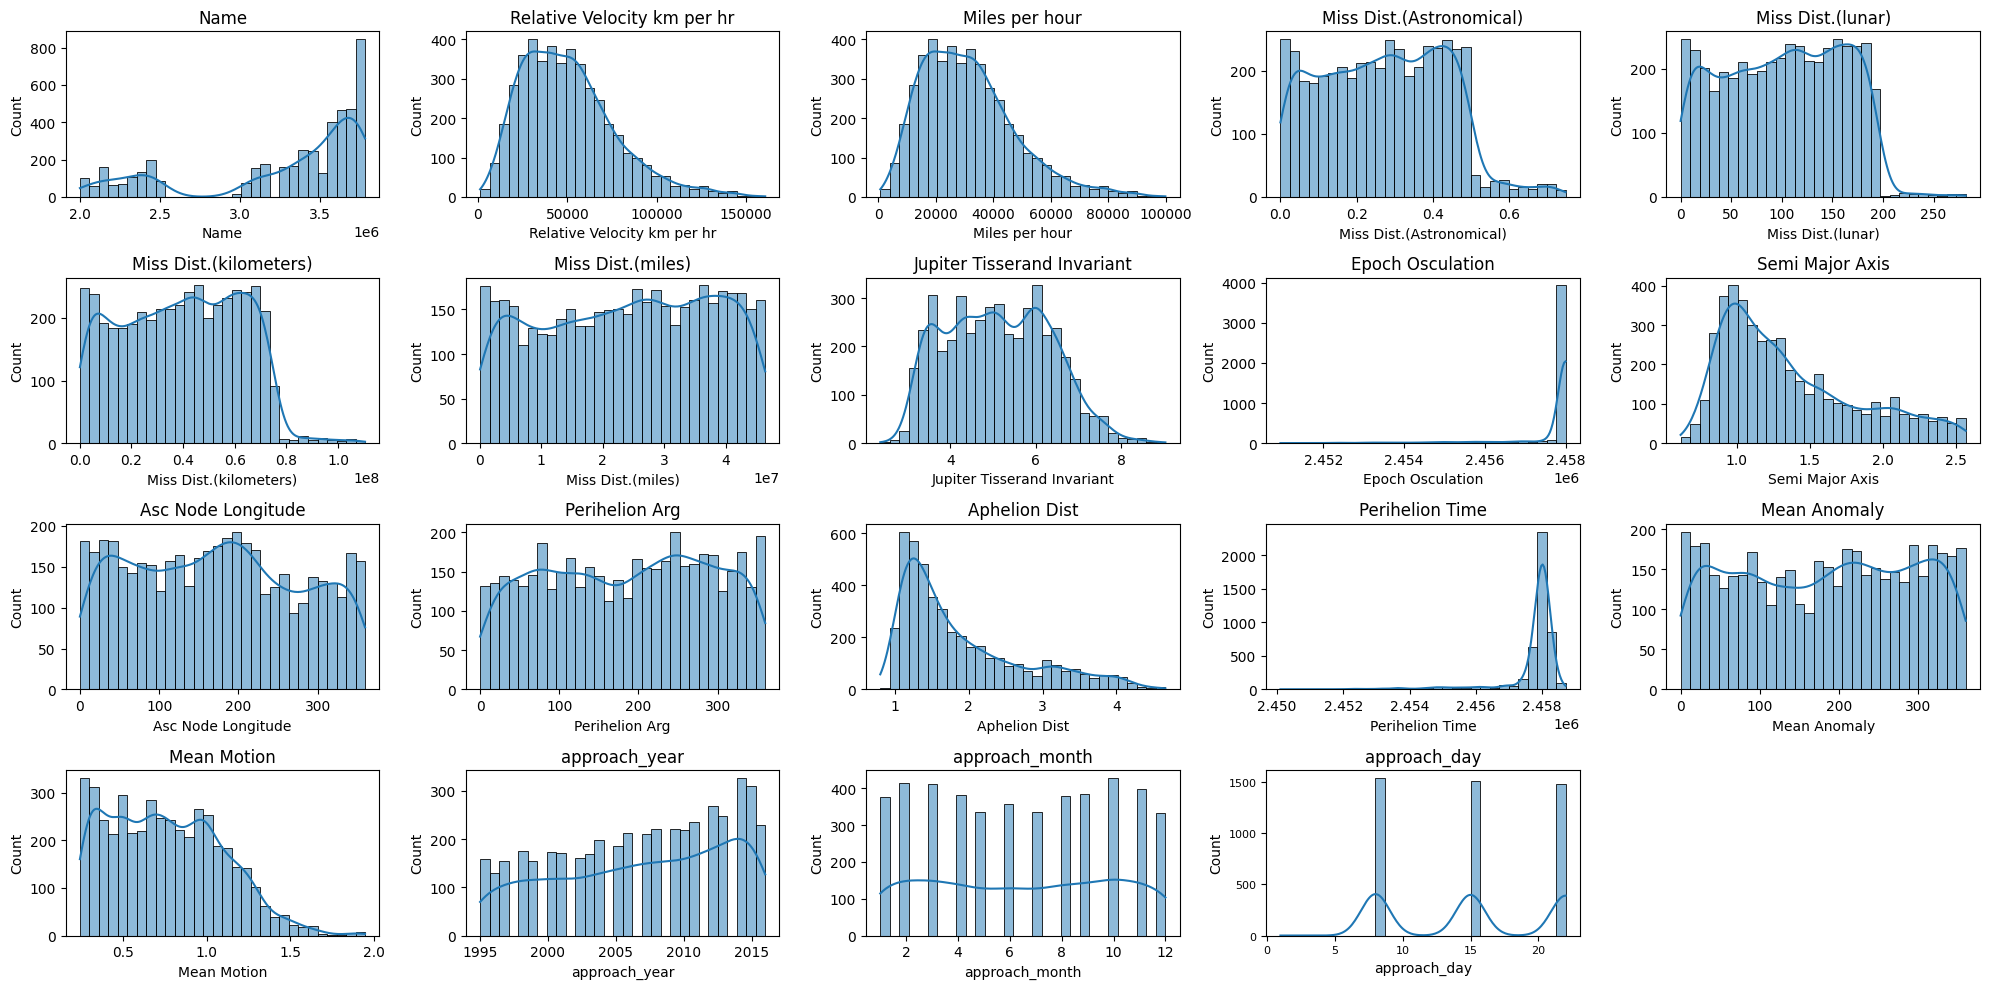

Skewness of numerical features:
 Name                          -1.083882
Relative Velocity km per hr    0.888959
Miles per hour                 0.888954
Miss Dist.(Astronomical)       0.160230
Miss Dist.(lunar)             -0.037176
Miss Dist.(kilometers)         0.004088
Miss Dist.(miles)             -0.103896
Jupiter Tisserand Invariant    0.177934
Epoch Osculation              -3.865882
Semi Major Axis                0.854882
Asc Node Longitude             0.094938
Perihelion Arg                -0.061270
Aphelion Dist                  1.156590
Perihelion Time               -3.866957
Mean Anomaly                  -0.053372
Mean Motion                    0.414063
approach_year                 -0.279388
approach_month                -0.004743
approach_day                   0.019901
dtype: float64


In [ ]:
plt.figure(figsize=(20, 10))

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'{feature}')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()
skewness = df[numerical_features].skew()
print("Skewness of numerical features:\n", skewness)

In [ ]:
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,...,Aphelion Dist(meters),Velocity at Perihelion,Velocity at Aphelion,Orbital Period (days),Synodic Period (days),Mean Motion (degrees/day),Relative Velocity Ratio,Orbital Energy Ratio,Perihelion To Earth Ratio,Velocity Change Indicator
0,0.955757,1995-01-01 08:00:00,Very Slow,0.130487,0.130487,0.561242,0.579059,0.568147,0.839102,0.328928,...,3.000622e+11,39561.275719,15941.935195,609.521845,911.393836,0.590627,9.745776e-08,-0.298142,1.926827,-25107.292810
1,0.967475,1995-01-04 20:00:00,Slow,0.401336,0.401336,0.766699,0.791039,0.518733,0.766123,0.328928,...,2.240039e+11,40866.543004,19601.489665,425.814844,2567.972794,0.845438,3.161356e-07,-0.337631,1.875151,-28284.626524
2,0.250597,1995-01-08 08:00:00,Slow,0.163781,0.163781,0.067967,0.070124,0.068803,0.101616,0.328928,...,2.942418e+11,35472.914321,17147.831171,643.497942,844.705702,0.559442,9.957758e-07,-0.248008,18.659318,-24655.814283
3,0.613020,1995-01-15 08:00:00,Very Slow,0.244668,0.244668,0.571083,0.589213,0.578117,0.570624,0.409432,...,2.285745e+11,34613.711923,20917.354857,495.534456,1389.221447,0.726488,1.749895e-07,-0.242229,2.163190,-26896.581424
4,0.850068,1995-01-15 08:00:00,Very Slow,0.214576,0.214579,0.545648,0.562970,0.552361,0.815825,0.418594,...,3.095620e+11,62628.751204,11560.621620,495.534456,1389.221447,0.726488,1.612965e-07,-0.086202,0.936587,-26897.914468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,0.987151,2016-09-08 07:00:00,Slow,0.492542,0.492542,0.055124,0.056874,0.055802,0.082418,0.418895,...,2.365624e+11,40363.859159,18928.827350,457.121531,1817.359931,0.787537,3.580481e-06,-0.336275,17.929192,-27619.128651
4530,0.987313,2016-09-08 07:00:00,Very Slow,0.065232,0.065232,0.008421,0.008688,0.008524,0.012589,0.306849,...,3.127699e+11,35454.511275,16377.496899,689.966051,776.093758,0.521765,3.332688e-06,-0.337876,149.295138,-24093.582698
4531,0.987548,2016-09-08 07:00:00,Very Slow,0.154772,0.154772,0.081422,0.084007,0.082424,0.121733,0.306849,...,3.127699e+11,35454.511275,16377.496899,689.966051,776.093758,0.521765,7.879719e-07,-0.337876,15.830099,-24089.616206
4532,0.987551,2016-09-08 07:00:00,Slow,0.248686,0.248691,0.348790,0.359863,0.353081,0.521470,0.316912,...,2.674449e+11,30454.716233,19767.128034,653.595521,827.915632,0.550799,2.910060e-07,-0.300168,4.449975,-24524.382777


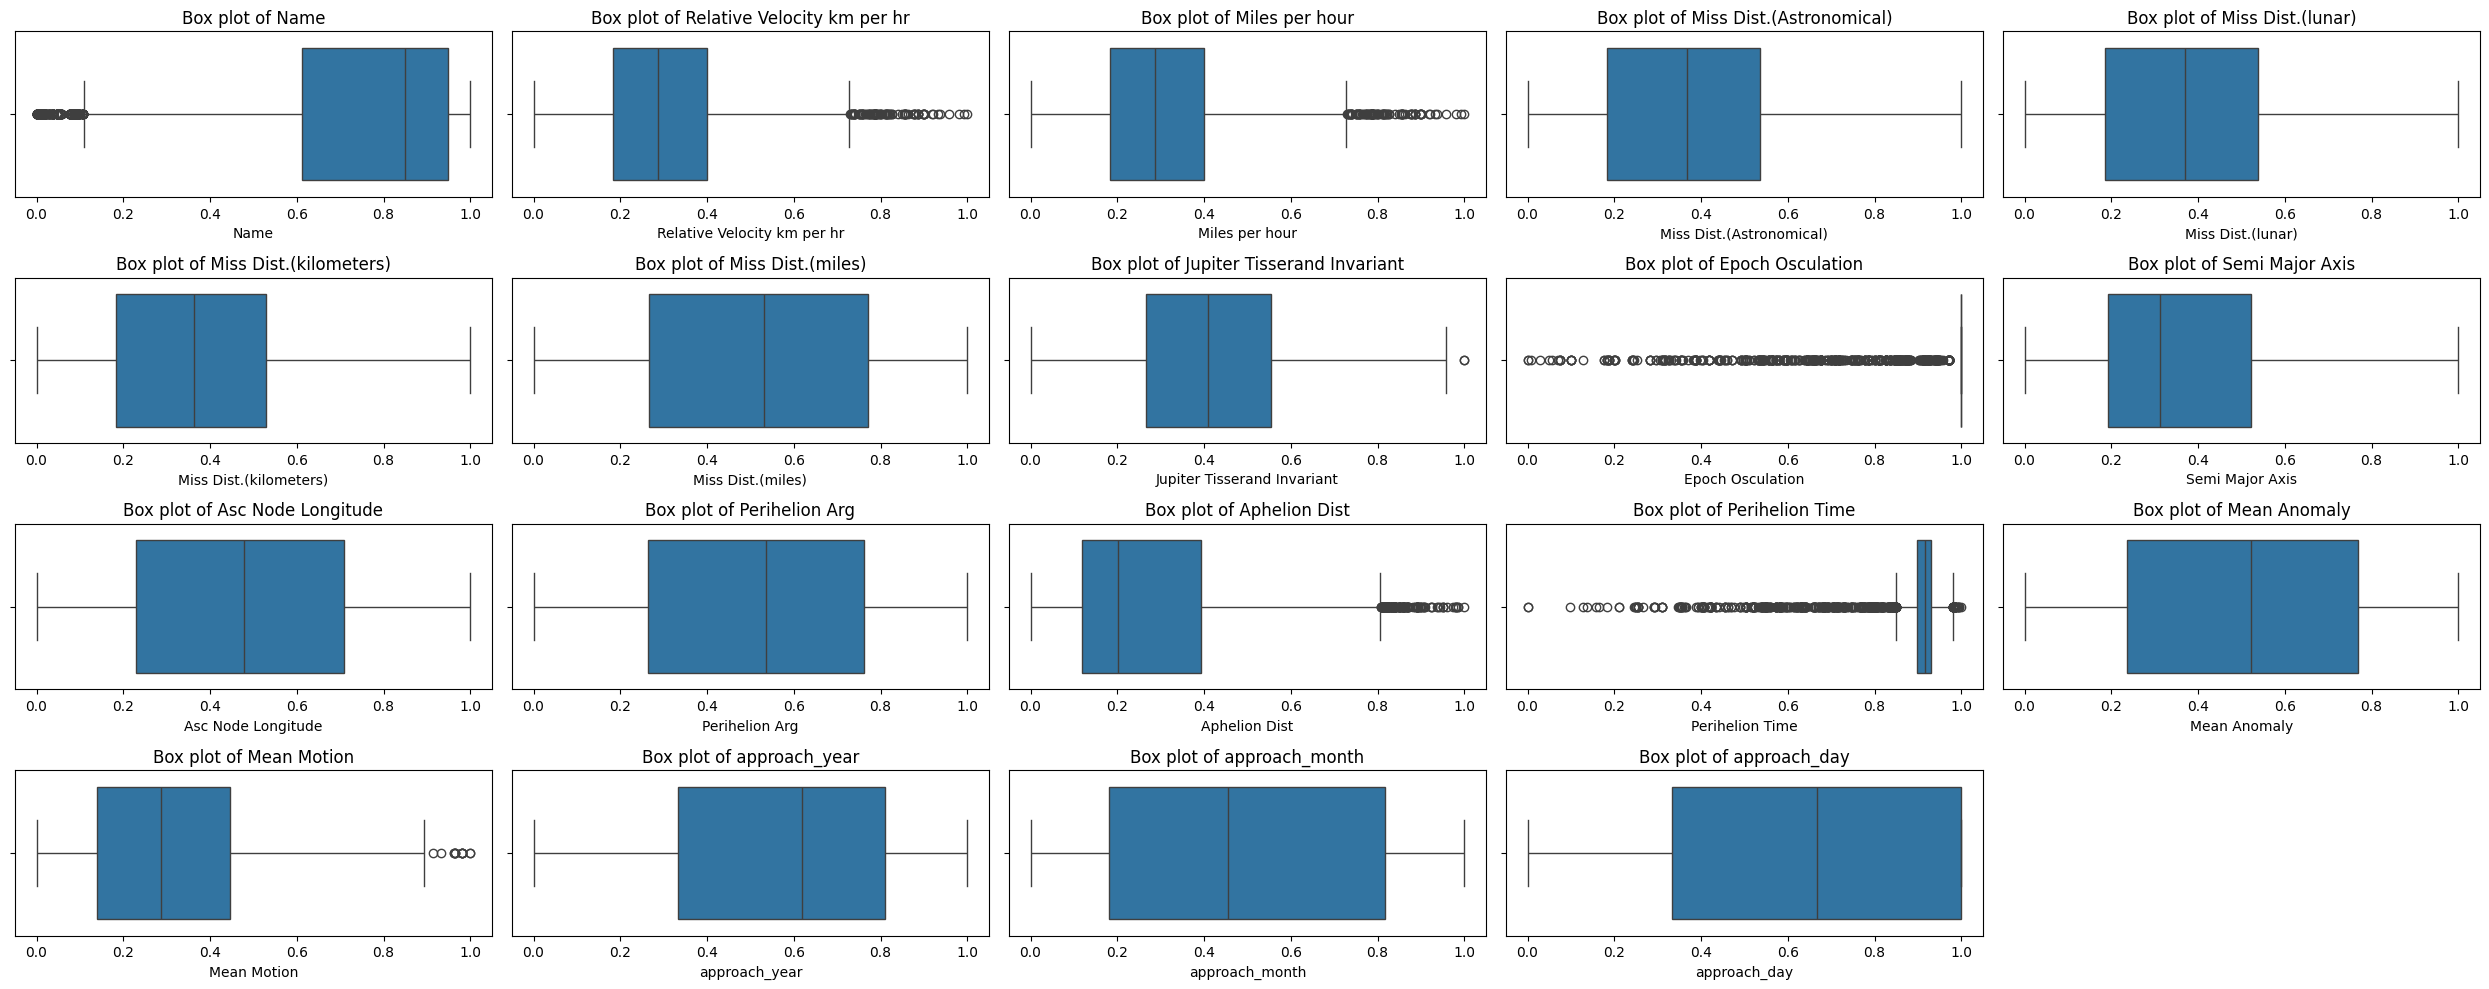

In [ ]:
plt.figure(figsize=(25, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
reverted_data = scaler.inverse_transform(df[numerical_features])
reverted_df = pd.DataFrame(reverted_data, columns=df[numerical_features].columns)

In [ ]:
z_scores = np.abs(stats.zscore(reverted_df))
outliers = (z_scores > 3).any(axis=1)  # Using a threshold of 3
print("Outliers identified in rows:", reverted_df[outliers])

Outliers identified in rows:            Name  Relative Velocity km per hr  Miles per hour  \
14    3446396.0                142579.180493    88593.158012   
22    3005973.0                102308.235340    63570.358787   
35    2267221.0                 52742.185854    32771.943205   
56    3773650.0                132850.034012    82547.844745   
57    2088959.0                132850.034012    82547.844745   
...         ...                          ...             ...   
4363  2466130.0                153789.175968    95558.613256   
4444  3720770.0                130700.608649    81212.275413   
4506  3781002.0                 49596.047395    30817.545566   
4526  3394709.0                 62202.593272    38650.272469   
4533  3772978.0                129408.666253    80409.512650   

      Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
14                    0.300963         117.074661            4.502344e+07   
22                    0.048541          18.88259

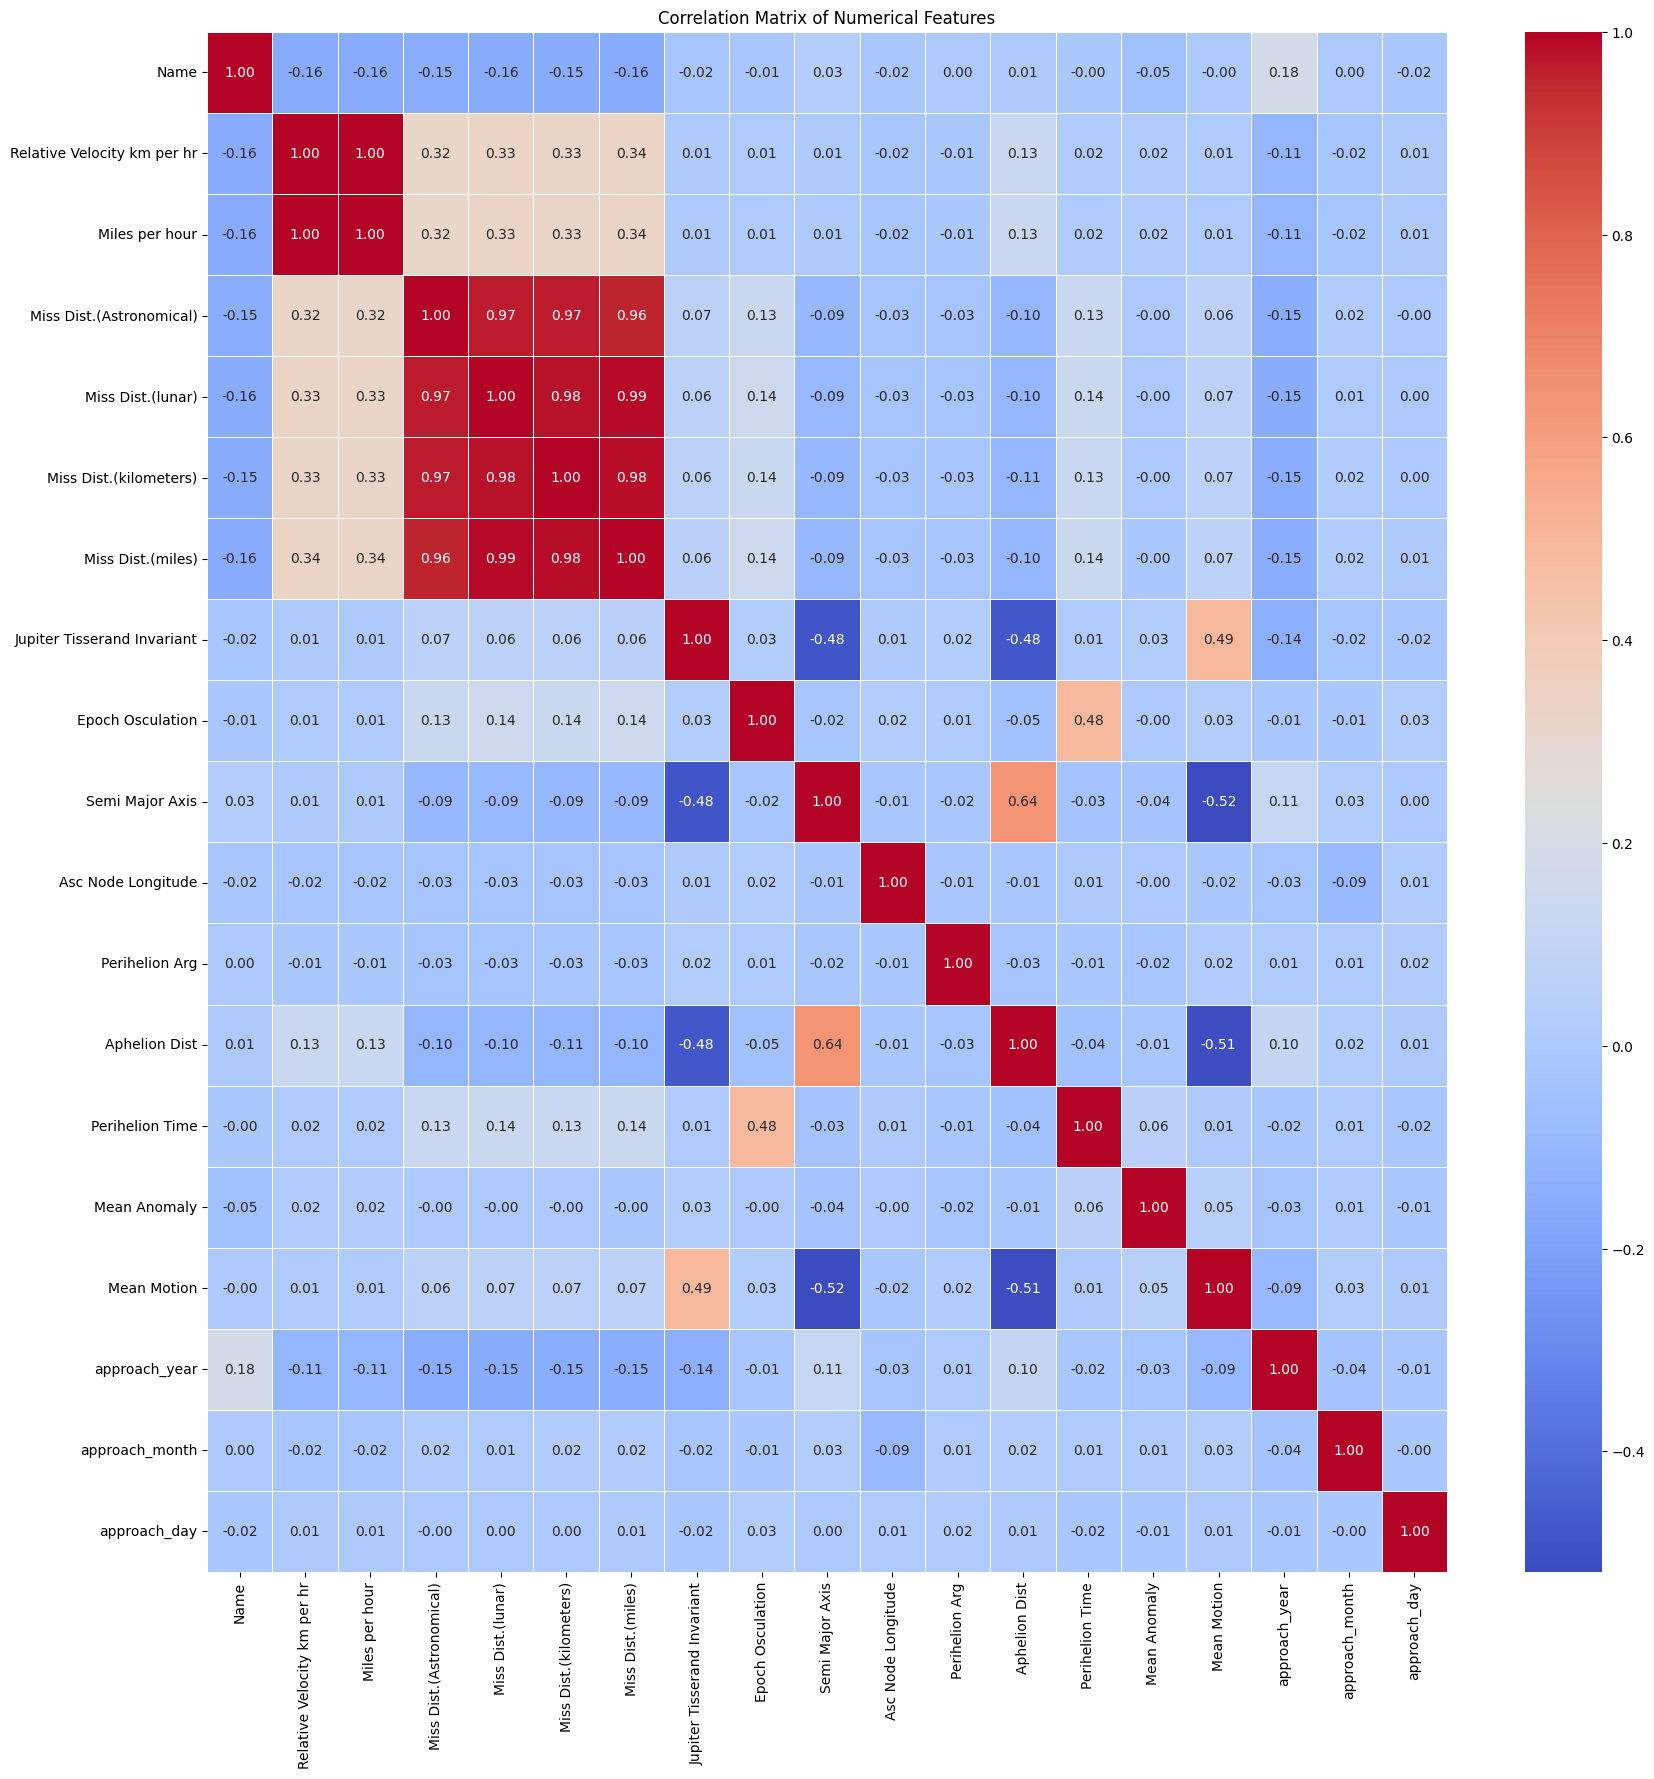

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Visualization**

In [ ]:
plt.figure(figsize=(10, 6))

# Pairplot for all numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Scatter Plots of Numerical Features', y=1.02)
plt.show()

##Inference of the pair plot

1)From the diagonal plots, we can infer the distribution of each feature. For example, if most distributions are skewed to the right, we might consider applying scaling or normalization.

2)From the off-diagonal plots, we can infer relationships between features. If we see a clear linear pattern between two variables, they might be strongly correlated. If there is no clear pattern, the variables may be weakly correlated or independent.

Diagonals focus on individual features, while off-diagonals emphasize pairwise interactions between features.

**Tackling** **Class** **Imbalance**

 ## Class Imbalance

Class imbalance occurs when the classes in a classification problem are not represented equally, meaning one class has significantly more samples than another. This imbalance can lead to biased models where the classifier favors the majority class, reducing accuracy for the minority class.

##Ways to tackle Class Imbalance

###Resampling Techniques:
Oversampling the minority class (e.g., using SMOTE—Synthetic Minority Over-sampling Technique).

###Using Class Weights:
Many machine learning algorithms (e.g., decision trees, logistic regression) allow setting class weights inversely proportional to class frequencies so that the minority class gets more weight during training.

###Anomaly Detection Methods:
 In highly imbalanced cases, models like one-class SVMs can treat the minority class as anomalies.

###Use of Different Metrics:
 Accuracy is not a good metric in imbalanced datasets. Instead, use metrics like F1 score, AUC-ROC, precision, and recall to evaluate the model's performance on both classes.
 ### Implication of class imbalance on model performance
Class imbalance can significantly affect model performance, particularly in binary classification tasks. The most common issue is that models tend to become biased toward the majority class, as optimizing for accuracy often leads the model to ignore the minority class altogether.

## Implication of class imbalance on model performance
Class imbalance can significantly affect model performance, particularly in binary classification tasks. The most common issue is that models tend to become biased toward the majority class, as optimizing for accuracy often leads the model to ignore the minority class altogether.

**Hazardous** **Classification**

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Features: {numerical_features}")

Numerical Features: ['Name', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis', 'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'approach_year', 'approach_month', 'approach_day', 'Orbital Period', 'Miss Distance vs Semi-major Axis Ratio', 'Time Until Approach', 'Perihelion Dist', 'eccentricity', 'Semi Major Axis(meters)', 'Average Orbital Velocity', 'Mean Anomaly(radians)', 'Eccentric Anomaly', 'True Anomaly(radians)', 'Heliocentric Distance', 'Escape Velocity', 'Specific Orbital Energy', 'Specific Angular Momentum', 'Perihelion Dist(meters)', 'Aphelion Dist(meters)', 'Velocity at Perihelion', 'Velocity at Aphelion', 'Orbital Period (days)', 'Synodic Period (days)', 'Mean Motion (degrees/day)', 'Relative Velocity Ratio', 'Orbital Energy Ratio', 'Perihelion To Earth R

In [ ]:
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df[numerical_features] = df[numerical_features].fillna(method='bfill')
df[numerical_features] = df[numerical_features].fillna(method='ffill')

<ipython-input-56-fab77807254e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numerical_features] = df[numerical_features].fillna(method='bfill')
<ipython-input-56-fab77807254e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numerical_features] = df[numerical_features].fillna(method='ffill')


In [ ]:
df.isna().sum()

,0
Name,0
Epoch Date Close Approach,0
Relative Velocity km per sec,0
Relative Velocity km per hr,0
Miles per hour,0
Miss Dist.(Astronomical),0
Miss Dist.(lunar),0
Miss Dist.(kilometers),0
Miss Dist.(miles),0
Jupiter Tisserand Invariant,0



## Dataframe to numpy

  



In [ ]:
timestamp_columns = df[numerical_features].select_dtypes(include=['datetime', 'datetime64']).columns

                                                                                           # Converting timestamps to Unix time
for col in timestamp_columns:
    df[col] = df[col].astype('int64') // 1e9

X = df[numerical_features].values                                                           # Now extract the numerical features again



X = X.astype(np.float32)


y = df['Hazardous'].values.astype(int).astype(np.float32)                                 # converting target features into numpy array

print(X.shape)
print(y.shape)
np.isnan(X).sum()

(4534, 44)
(4534,)


0

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Neural Network**




In [ ]:
def create_model(units=32, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(16, activation = 'tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Kfold cross Validation

In [ ]:
from builtins import range
def Kfold_cross_validation(X, y, k=5, epochs=10, units=32, learning_rate=0.001):

    losses = [[] for _ in range(k)]                                               # Initializing losses and accuracies per fold using np.empty
    accuracies = [[] for _ in range(k)]

    X = X.astype(np.float32)
    y = y.astype(int).astype(np.float32)


    kf = KFold(n_splits=k, shuffle=True, random_state=42)                               # Initializing KFold

    fold_index = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = create_model(units=units, learning_rate=learning_rate)                             # Training the model
        data = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)


        losses[fold_index] = data.history['loss']                                             # Appending the loss values
        accuracies[fold_index] = data.history['accuracy']                                     # Appending the accuracy values
        fold_index += 1

    # Ploting Loss vs Epochs for each fold
    plt.figure(figsize=(12, 6))
    for i in range(k):
        plt.plot(losses[i], label=f'Fold {i+1} Loss', marker='*')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Ploting Accuracy vs Epochs for each fold
    plt.figure(figsize=(12, 6))
    for i in range(k):
        plt.plot(accuracies[i], label=f'Fold {i+1} Accuracy', marker='*')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return losses, accuracies

### **Hyper Parameter Tuning**


In [ ]:
def grid_search(X_train, y_train, X_test, y_test):
    param_grid = {
        'model__learning_rate': [0.001, 0.01, 0.1],
        'model__units': [16, 32, 64],
    }


    model_ = KerasClassifier(model=create_model, verbose=0)                         # Instiatiating KerasClassifier with a model creation function


    grid = GridSearchCV(estimator=model_, param_grid=param_grid, n_jobs=-1, cv=3)     # Performing grid search
    grid_result = grid.fit(X_train, y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


    best_model = grid_result.best_estimator_


    test_accuracy = best_model.score(X_test, y_test)                                    # Evaluating the best model using the score method
    print(f"Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


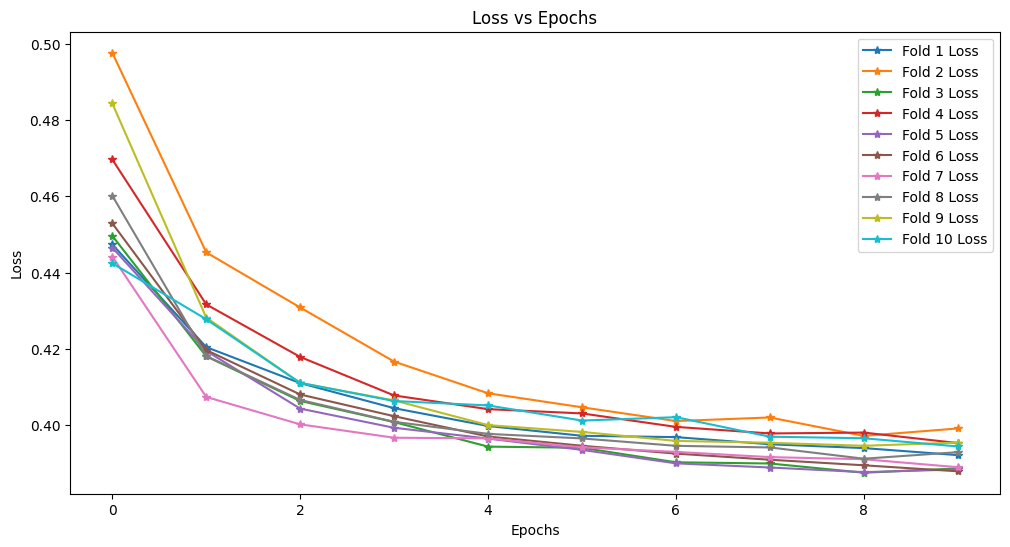

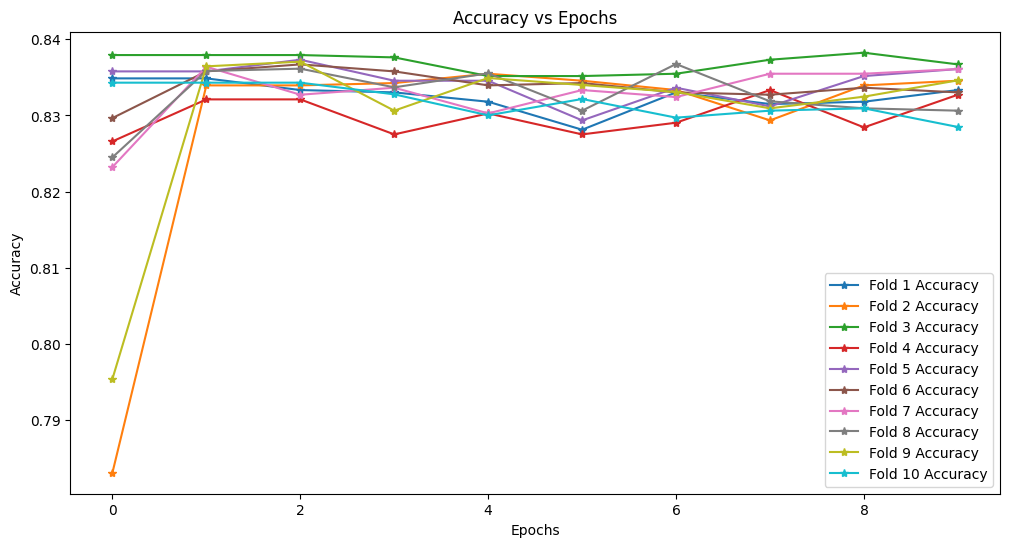

([[0.4473813474178314,
   0.42047515511512756,
   0.4110381305217743,
   0.4044727385044098,
   0.39979684352874756,
   0.3972320258617401,
   0.3968855142593384,
   0.39500999450683594,
   0.3940153419971466,
   0.392165869474411],
  [0.4976254403591156,
   0.4452952444553375,
   0.4308602213859558,
   0.41667497158050537,
   0.408371239900589,
   0.4047057628631592,
   0.40109822154045105,
   0.4020349979400635,
   0.3972017765045166,
   0.3991594612598419],
  [0.44963765144348145,
   0.41806015372276306,
   0.4063630700111389,
   0.4008294641971588,
   0.39439451694488525,
   0.39409419894218445,
   0.39028847217559814,
   0.3899747133255005,
   0.38755545020103455,
   0.3886794149875641],
  [0.46965381503105164,
   0.431665301322937,
   0.41790062189102173,
   0.4077998101711273,
   0.4042166769504547,
   0.40309661626815796,
   0.39956846833229065,
   0.39784666895866394,
   0.3980764150619507,
   0.3953295946121216],
  [0.44656723737716675,
   0.4194677472114563,
   0.40435582399

In [ ]:
Kfold_cross_validation(X_train, y_train, k=10, epochs=10, units=32, learning_rate=0.001)

In [ ]:
grid_search(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.835401 using {'model__learning_rate': 0.001, 'model__units': 16}
Test Accuracy: 0.8467475192943771


In [ ]:
model= create_model(units=16,learning_rate=0.01)
model.fit(X_train,y_train,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8094 - loss: 0.4698
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.4034
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8231 - loss: 0.4304
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8324 - loss: 0.4003
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4015
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3866
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.3755
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8279 - loss: 0.4026
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3831
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.3885
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3832
Epoch 12/100
114/114 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_probs=model.predict(X_test)
y_pred=(y_probs>0.3).astype(int)
print(y_pred)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [ ]:
np.isnan(y_probs).sum()

0

In [ ]:
np.isnan(X_train).sum()

0

## ROC curve
The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.

Area Under the ROC Curve (AUC): The AUC represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance. Mathematically, the AUC is the integral of the ROC curve



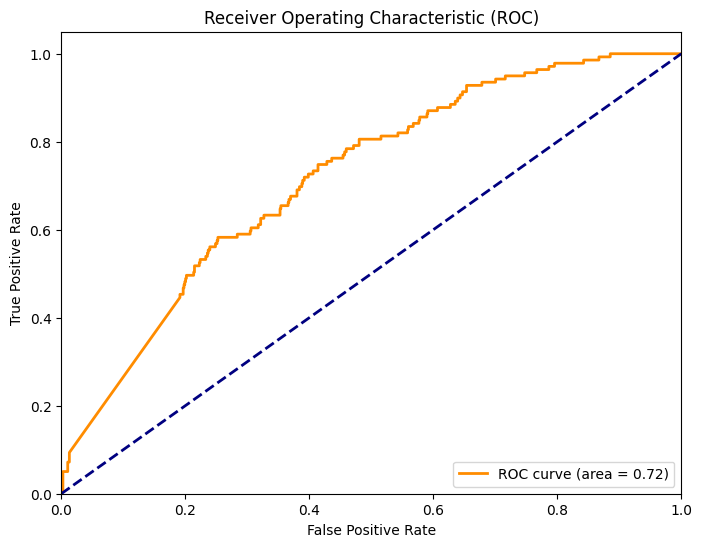

In [ ]:
false_pos_r, true_pos_r, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(false_pos_r, true_pos_r)


plt.figure(figsize=(8, 6))
plt.plot(false_pos_r, true_pos_r, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Confusion Matrix

This matrix shows the actual vs. predicted class counts:
True Positives (TP): Correctly classified positive instances.
True Negatives (TN): Correctly classified negative instances.
False Positives (FP): Negative instances misclassified as positive.
False Negatives (FN): Positive instances misclassified as negative.

 It provides a complete picture of the model’s performance, allowing you to compute key metrics like accuracy, precision, recall, and the F1 score. It tells you where the model is making mistakes (false positives and false negatives).


<Figure size 600x600 with 0 Axes>

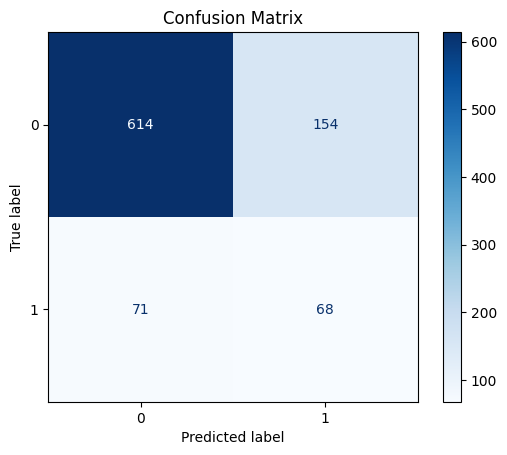

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Ploting the Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Shap values
SHAP (SHapley Additive exPlanations) is based on Shapley values from cooperative game theory.

$$
\phi_j = \sum_{S \subseteq N \setminus \{j\}} \frac{|N|!}{|S|! (|N| - |S| - 1)!} [f(S \cup \{j\}) - f(S)]
$$


This equation computes the contribution of feature j by comparing the model's output with and without that feature across all possible subsets S. The SHAP value ϕj represents the average contribution of feature j to the model's prediction.

PermutationExplainer explainer: 908it [01:31,  9.24it/s]


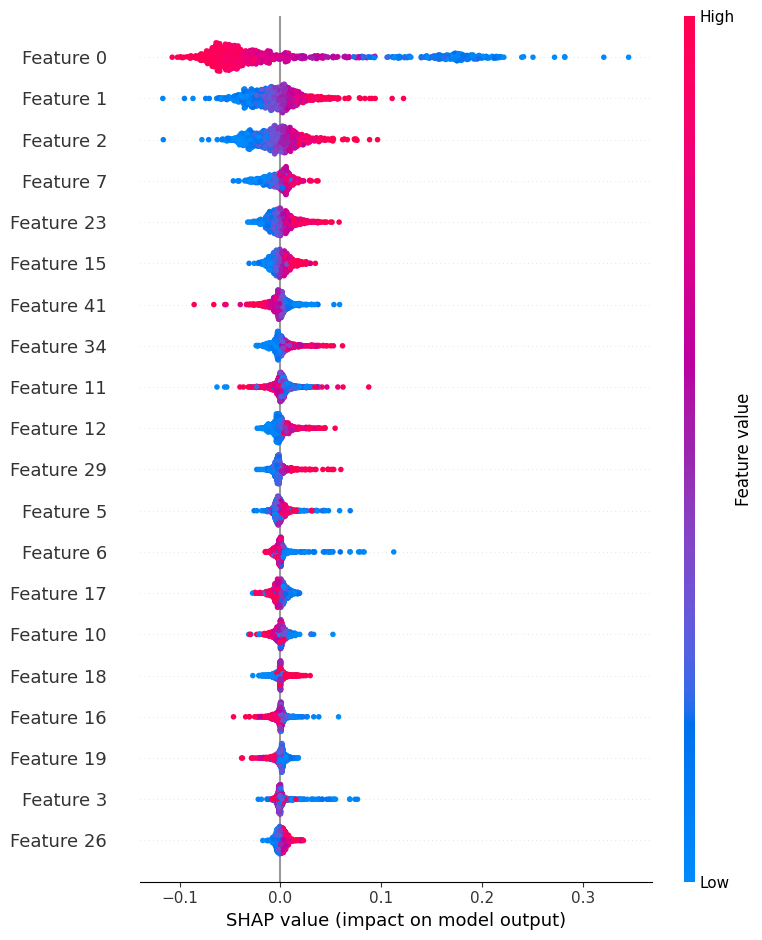

In [ ]:
explainer = shap.Explainer(model, X_test)                                 # Fiting the SHAP explainer to the model
shap_values = explainer(X_test)

# Ploting the SHAP summary to see feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.show()


## Permutation Importance
 Permutation importance measures the decrease in model performance when a feature’s values are randomly shuffled. If the model's performance drops significantly after shuffling a feature, that feature is considered important.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


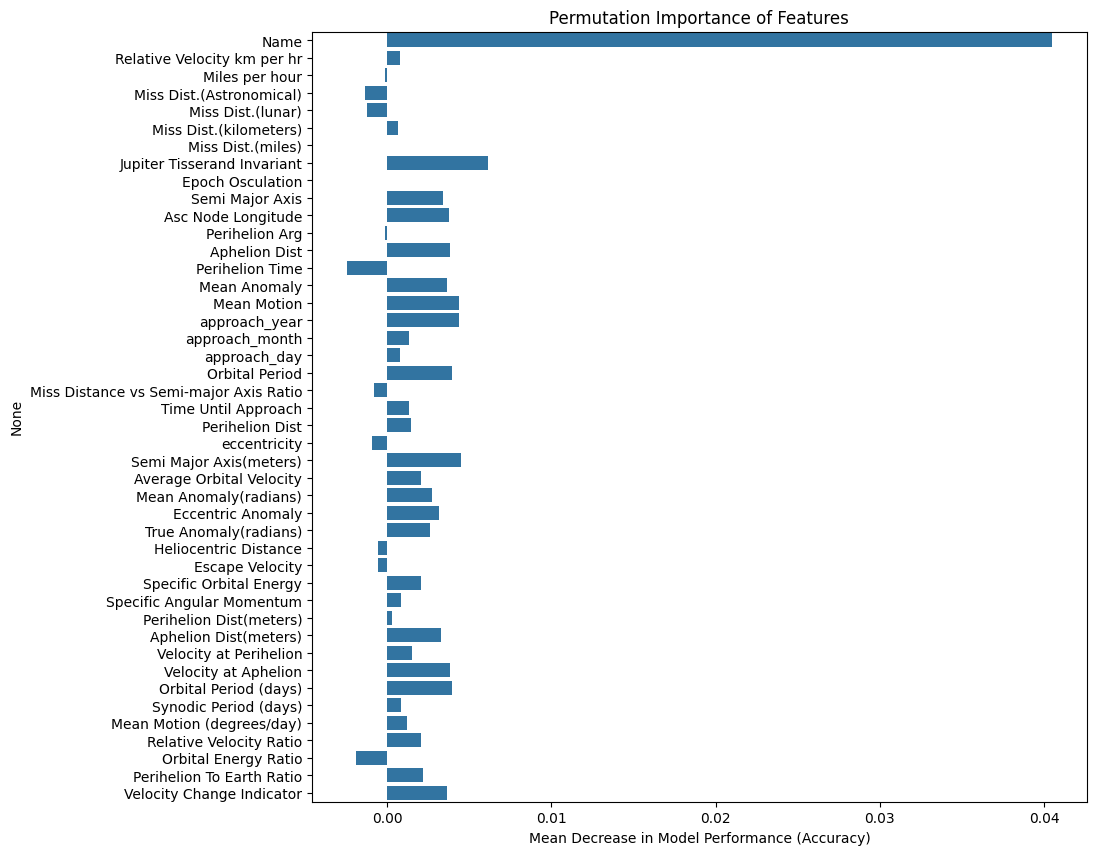

In [ ]:
def custom_scoring(model, X, y):
    y_probs = model.predict(X)
    y_pred = (y_probs > 0.3).astype(int)
    return accuracy_score(y, y_pred)

perm_importance = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42,
    scoring=lambda model, X, y: custom_scoring(model, X, y)
)

X_test_df = pd.DataFrame(X_test, columns=numerical_features)

plt.figure(figsize=(10, 10))
sns.barplot(x=perm_importance.importances_mean, y=X_test_df.columns)
plt.title("Permutation Importance of Features")
plt.xlabel("Mean Decrease in Model Performance (Accuracy)")
plt.show()



**Anomaly Detection**

Inbuilt Method Anomalies: 227
Custom Method Anomalies: 216


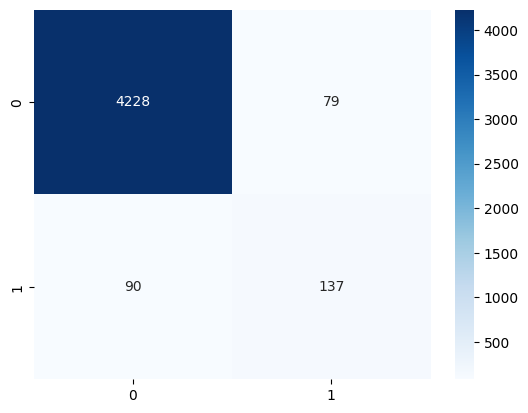

Confusion Matrix:
[[4228   79]
 [  90  137]]
Anomalies flagged by both methods: 137


In [ ]:
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn.metrics import confusion_matrix

def anomaly_detection():
    features = [
         'Miss Dist.(kilometers)','Relative Velocity km per hr', 'Jupiter Tisserand Invariant',
        'Aphelion Dist', 'Mean Motion', 'Perihelion Time'
    ]
    data_scaled = df[features]

    # Inbuilt Method: Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df['inbuilt_anomaly'] = iso_forest.fit_predict(data_scaled)
    df['inbuilt_anomaly'] = df['inbuilt_anomaly'].map(
        {-1: 1, 1: 0})  # 1 = anomaly, 0 = normal

    z_scores = np.abs(stats.zscore(data_scaled))
    threshold = 3.05
    df['custom_anomaly'] = (z_scores > threshold).any(axis=1).astype(int)

    print("Inbuilt Method Anomalies:", df['inbuilt_anomaly'].sum())
    print("Custom Method Anomalies:", df['custom_anomaly'].sum())

    conf_matrix = confusion_matrix(df['inbuilt_anomaly'], df['custom_anomaly'])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.show()

    print("Confusion Matrix:")
    print(conf_matrix)
    print("Anomalies flagged by both methods:", conf_matrix[1, 1])

anomaly_detection()



### **Handling Binned Values**

In [ ]:
velocity_mapping = {'Very Slow': 0, 'Slow': 1, 'Fast': 2, 'Very Fast': 3}
df['Relative Velocity km per sec'] = df['Relative Velocity km per sec'].map(velocity_mapping)

In [ ]:
# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

df = pd.get_dummies(df, columns=['Orbital Period'], prefix='Orbital_Period')

In [ ]:
uncertainty_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].map(uncertainty_mapping)